#### constitutive equations
$$\begin{align}
J_n &= q n \mu_n \vec{E} + qD_n \nabla n \\
J_p &= q_p \mu_p \vec{E} - qD_p \nabla p \\
\vec{E} &= -\nabla \phi
\end{align}$$

#### drift-diffusion formulation

#### finite elements
$$ \Lambda _n (x)$$



#### weak form:
$$\begin{align}
\int_\Omega -\nabla\cdot ( D\nabla \cdot u + \mu \cdot u)\Lambda _n &= - \int_\Omega f \Lambda_n \\
\Rightarrow \int_\Omega ( D\nabla \cdot u + \mu \cdot u) \Lambda _n &= - \int_\Omega f \Lambda_n \\

\end{align} $$

In [96]:
import numpy, scipy
import matplotlib.pyplot as plt

class Domain:
    def __init__(self, number, bounds = [float(0), float(1)]):
        self.number = number
        self.domain = numpy.linspace(*(bounds+[number]))
        self.deltah = float((bounds[1]-bounds[0])/number)
    
class Field:
    def __init__(self, name, number):
        self.name = name
        self.data = numpy.zeros(number)
        
class Stencil:
    def __init__(self, S):
        self.op = numpy.array(S)
    def apply(self, stiffnessMatrix):
        return stiffnessMatrix

class Assembler:
    def __init__(self, X, B):
        self.unknowns = X
        
class Problem:
    def __init__(self, number, bounds = [float(0), float(1)]):
        self.omega = Domain(number, bounds)
        self.unknown = Field("default", number)
        self.num_unknowns = number
        
    def plotDomain(self):
        plt.scatter(self.omega.domain, numpy.zeros(self.num_unknowns), color = 'black')
        
    def plotSolution(self):
        plt.scatter(self.omega.domain, self.unknown.data, color = 'blue')

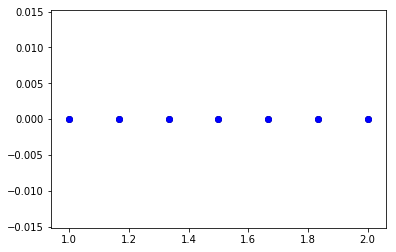

In [97]:
dd = Problem(7, [1,2])
dd.plotDomain()
dd.plotSolution()

In [55]:
numpy.zeros(20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

-(au' + bu)' + f = 0
\int (au' + bu)\Lambda + bdy terms = -\int f\Lambda


In [9]:
laplacian = Stencil(numpy.array([-1,2,-1]))
laplacian

In [11]:
print laplacian.op

[-1  2 -1]


0:  |F(x)| = 626.642; step 1; tol 0.000157679
1:  |F(x)| = 234.793; step 1; tol 0.12635
2:  |F(x)| = 114.96; step 1; tol 0.215756
3:  |F(x)| = 24.1227; step 1; tol 0.0396281
4:  |F(x)| = 1.53242; step 1; tol 0.00363199
5:  |F(x)| = 0.118362; step 1; tol 0.00536927
6:  |F(x)| = 0.00888126; step 1; tol 0.00506715
7:  |F(x)| = 0.000125069; step 1; tol 0.00017848
Residual: 5.79042e-06


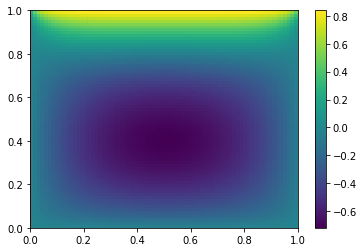

In [36]:
%matplotlib inline
import numpy as np
from scipy.optimize import newton_krylov
from numpy import cosh, zeros_like, mgrid, zeros

# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)

P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

def residual(P):
    d2x = zeros_like(P)
    d2y = zeros_like(P)

    d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
    d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
    d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

    d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
    d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
    d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

    return d2x + d2y - 10*cosh(P).mean()**2

# solve
guess = zeros((nx, ny), float)
sol = newton_krylov(residual, guess, method='lgmres', verbose=1)
print('Residual: %g' % abs(residual(sol)).max())

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolor(x, y, sol)
plt.colorbar()
plt.show()